<h1 style="font-size:40px;"><center>Exercise II: Performance
    
</center></h1>

# Excercise 2 - Performance

From now on we will talk about *performance*! It can be performance of a trained model on the training dataset or the performance on the validation dataset. What do we mean by performance?  For classification problems we will provide 4 different measurements as returned by a call to the *stats_class* function. They are:
* Sensitivity = fraction of correctly classified "1" cases
* Specificity = fraction of correctly classified "0" cases
* Accuracy = fraction of correctly classified cases
* loss = cross-entropy error (so low loss means good performance!)

A suggestion for you is to either use accuracy or loss as your performance measure.

**Note:** Use a fixed random seed for this exercise since you will compare between runs. 

# Data: syn1 - syn3
Three different synthetic classification problems will be used. They are all 2D binary classification problems which allows for an easy visual inspection of the different classes and the decision boundary implemented by the network. They are called *syn1, syn2* and *syn3*. Each of these datasets are generated "on the fly" each time. They come from various normal distributions. Since they are generated using random numbers it means that each time you generate the data it will be slightly different from next time. You can control this by having a fixed *seed* to the random number generator. The cell "PlotData" will plot these datasets.

## Code

In [57]:
# Generate training data
x_train, d_train = MLPData.syn2(100)
x_val, d_val = MLPData.syn2(1000)

train_loader = numpy2Dataloader(x_train,d_train)
val_loader =  numpy2Dataloader(x_val,d_val)

In [33]:
config = {
    'model_params':{
        'inp_dim':x.shape[1],         
        'hidden_nodes':1,   # activation functions for the hidden layer
        'num_out':1 # if binary --> 1 |  regression--> num inputs | multi-class--> num of classes
    },
    'optimizer':'Adam',               # minimization method
    'criterion':'BCELoss', # error function
    'max_epochs':100,
}

In [34]:
%%time
# Get the model
model = Agent(MLP,**config)

# Train the model
trainer = pl.Trainer(
            max_epochs=config['max_epochs'], 
            gpus=-1 if torch.cuda.is_available() else None, 
            logger=metrics.MetricsLogger(),
            progress_bar_refresh_rate=1,
            weights_summary=None, # Can be None, top or full
            num_sanity_val_steps=10, 
            callbacks=[progressbar.LitProgressBar()]
        )

trainer.fit(
    model, 
    train_dataloader=train_loader,
    val_dataloaders=val_loader
);

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


CPU times: user 6.08 s, sys: 1min 15s, total: 1min 21s
Wall time: 1min 26s



 ########## STATISTICS for Training Data ########## 

Accuracy   0.5
Sensitivity   0.0
Specificity   1.0
Loss   Not implemented

 ##################################################

 ########## STATISTICS for Validation Data ########## 

Accuracy   0.5
Sensitivity   0.0
Specificity   1.0
Loss   Not implemented

 ##################################################


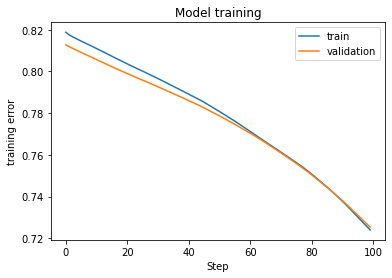

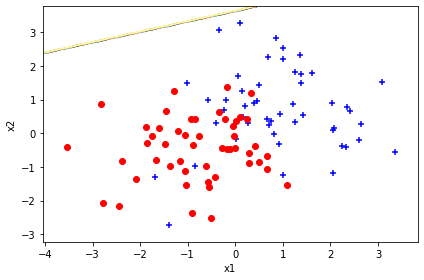

In [42]:
# Call the stats function to print out statistics for classification problems
metrics.stats_class(x_train, d_train, 'Training', model)
metrics.stats_class(x_val, d_val, 'Validation', model)

# Plot the learning curves
plt.plot(trainer.logger.data['loss'])
plt.plot(trainer.logger.data['val_loss'])
plt.title('Model training')
plt.ylabel('training error')
plt.xlabel('Step')
plt.legend(['train', 'validation'], loc=0)
plt.show()

# Show the decision boundary for the training dataset
plot.decision_bondary(model, x_train, d_train)

# If you uncomment this one you will see how the decsion boundary is with respect to the validation data
#decision_b(x_val, d_val)


## Task 1
Train a classifier for the *syn2* dataset. Use the a validation dataset (val_loader) as an estimate of the *true* performance. Since we generate these datasets we can allow for a relatively large validation dataset in order to get a more accurate estimation of *true* performance. The default value in the cell is to generate 1000 validation datapoints. 

Now, use syn2 dataset with 100 training data points and train a *linear* MLP to separate the two classes, i.e. use a single hidden node.

**Question:** What is the performance you get on the validation dataset?

## Task 2
This task should overtrain the MLP! Increase the number of hidden nodes to get better and better training performance.

**Hint:** Overtraining here often means finding good local minimum of the error function, which may require some tuning of the learning parameters. This means that you may have to change the learning rate, increase the number of epochs and use "better" minimization methods. Even though we have not yet talked about the *Adam* minimization method, it is generally better than vanilla *stochastic gradient descent*. It is therefore used in the cells below as the default minimizer. Also you may want to change the size of the "batch_size" parameter. It is by default using all data.

**Question:** How many hidden nodes do you need to reach an accuracy >95% on your training dataset?

## Task 3
Now you are going to use the *syn3* dataset. So, use **150** training datapoints from the synthetic dataset 3 and train an MLP to separate the two classes. Also use about 1000 datapoints for validation.

**Question:** When you overtrained in the previous question, how much much did the validation *loss* increase, compared to the linear model of Task 2?

**Question:** What is the optimal number of hidden nodes for the syn2 dataset in order to maximize your validation performance?

**Question:** How many hidden nodes do you need to find a reasonable solution to the problem?  Extra: Can you figure out why this many?